C:\Users\jackw\AppData\Local\Temp\ipykernel_16756\3597818999.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sink_data['Cabin'].fillna(mode_cabin, inplace=True)
C:\Users\jackw\AppData\Local\Temp\ipykernel_16756\3597818999.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Zone 1
Zone 2
Zone 3


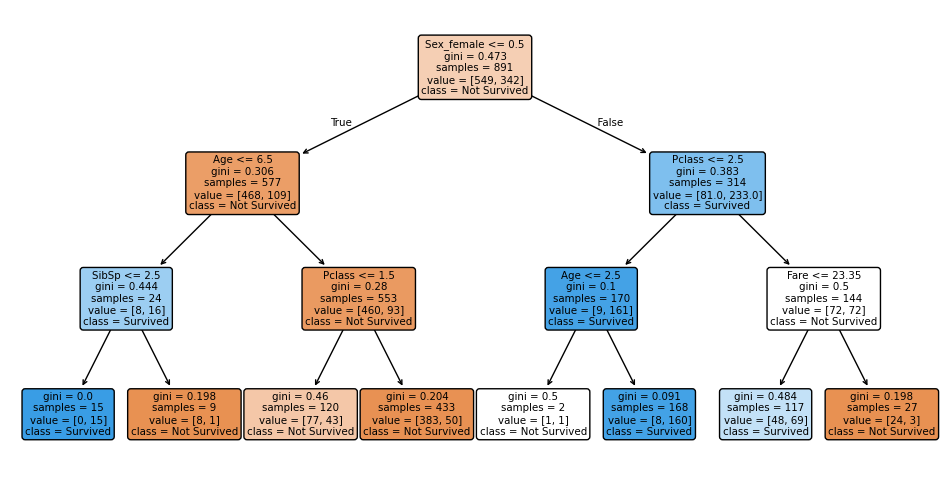

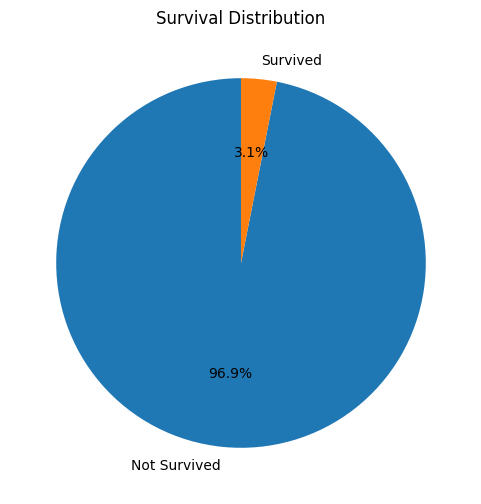

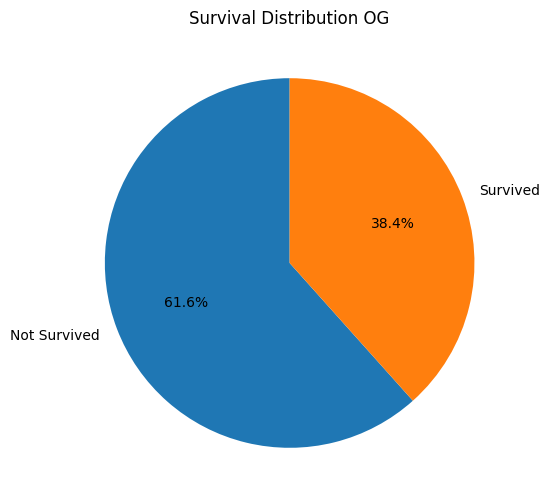

In [22]:
# import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt


sink_data = pd.read_csv('C:/Users/jackw/OneDrive/Desktop/Kaggle/train.csv')
test_data = pd.read_csv('C:/Users/jackw/OneDrive/Desktop/Kaggle/test.csv')

# Fill in gaps in the train data
median_age = sink_data['Age'].median()
mode_embarked = sink_data['Embarked'].mode()[0]
mode_cabin = sink_data['Cabin'].mode()[0]

#fill in gaps in the test data
median_age = test_data['Age'].median()
mode_embarked = test_data['Embarked'].mode()[0]
mode_cabin = test_data['Cabin'].mode()[0]

sink_data['Cabin'].fillna(mode_cabin, inplace=True)
sink_data['Embarked'].fillna(mode_embarked, inplace=True)
sink_data['Age'].fillna(median_age, inplace=True)
test_data['Cabin'].fillna(mode_cabin, inplace=True)
test_data['Embarked'].fillna(mode_embarked, inplace=True)
test_data['Age'].fillna(median_age, inplace=True)

# encode catagorical data
sink_data = pd.get_dummies(sink_data, columns=['Sex', 'Embarked'])

# drop specific data points for X/y
X = sink_data.drop(columns=['Name', 'PassengerId', 'Survived', 'Ticket', 'Cabin'])
print('Zone 1')
y = sink_data['Survived']


# Train the data
model = DecisionTreeClassifier(max_depth=3)
print('Zone 2')
model.fit(X, y)
print('Zone 3')


# fill in empty columns of test_data
for col in X.columns:
    if col not in test_data.columns:
        test_data[col] = 0

# Ensure the columns are in the same order as X
test_data = test_data[X.columns]

# used trained model to predict on test data
test_predictions = model.predict(test_data)

# makes passengerID start at 892

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'PassengerId': test_data.index + 892,  # Assuming PassengerId is the index + 1
    'Survived': test_predictions
})


# Save the predictions to a CSV file
submission.to_csv('C:/Users/jackw/OneDrive/Desktop/Kaggle/submission.csv', index=False)



plt.figure(figsize=(12, 6))  # Set the plot size
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()  # Display the tree



# Count the number of survivors
survived_count = submission['Survived'].value_counts()
survived_count_og_data = sink_data['Survived'].value_counts()

# pie charts because hell yeah
plt.figure(figsize=(6, 6))
plt.pie(survived_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.show()

# OG data pie chart for comparison
plt.figure(figsize=(6, 6))
plt.pie(survived_count_og_data, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution OG')
plt.show()


In [23]:
submission_data = pd.read_csv('C:/Users/jackw/OneDrive/Desktop/Kaggle/submission.csv')
submission_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
